In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%run sim_utilities.py

import bandits_lab.bandit_definitions as bands
import bandits_lab.algorithms as algs

<Figure size 640x480 with 0 Axes>

In [50]:
np.set_printoptions(precision=2)

In [56]:
def plot_and_save(
    data_dict,
    save_figure=False,
    skip_algs=[],
    log_scale=True,
    show_vars=True,
    **kwargs,
):
    colors = plt.get_cmap("tab10").colors
    T = data_dict["T"]
    if "tslice" in kwargs:
        tslice = kwargs["tslice"]
    else:
        tslice = range(T)
    nplots = len(data_dict["band_list"])
    fig, axes = plt.subplots(nrows=nplots, ncols=1, figsize=(8, 8), sharey="all")
    for i, band in enumerate(data_dict["band_list"]):
        ax = axes[i]
        for j, alg in enumerate(data_dict["alg_list"]):
            if j in skip_algs or not (data_dict["ended"][i][j]):
                continue
            mean_reg, var_reg = data_dict["results"][i][j]
            if "rescale" in kwargs.keys():
                if kwargs["rescale"]:
                    mean_reg = np.array(mean_reg) / data_dict["scales"][i]
                    var_reg = np.array(var_reg) / np.square(data_dict["scales"][i])
            if log_scale:
                ax.set_xscale("log")  # , nonposx='clip')
                ax.set_yscale("log")  # , nonposx='clip')
            ax.set_title(r'$p^*=$' + str(band.p_star))
            ax.plot(
                tslice, mean_reg[tslice], label=alg.label, color=colors[j],
            )
            if show_vars:
                sig = np.sqrt(var_reg[tslice] / data_dict["N_tests"][i])
                ax.fill_between(
                    tslice,
                    mean_reg[tslice] + 2 * sig,
                    mean_reg[tslice] - 2 * sig,
                    alpha=0.3,
                    color=colors[j],
                )
        
        ax.legend(loc=2, prop={'size': 15})
        

    if save_figure:
        plt.tight_layout()
        # save_data_dict(data_dict)
        path = uniquify(data_dict["short_name"] + ".pdf")
        plt.savefig(path, format="pdf")
        

# Transition from logarithmic to bounded regret

In [ ]:
K = 3

alpha = np.array([0.1, 0, -0.1])
mus_base =  np.array([ 1/2, 1/3, 1/2])
mus_list = [mus_base - alpha, mus_base + alpha]
noise = "gaussian"

In [29]:
# l = 0.2
# ls = [0]+[l for _ in range(K-1)]
# constraints_list = [(ls[i], 1, np.array([1*(j==i) for j in range(K)])) for i in range(K)]
# C = bands.PolytopeConstraints(K, constraints_list)

# min_reward, max_reward = C.argmax_dot(-mus), C.argmax_dot(mus)
# print(max_reward)
# delta_max =  max_reward.fun - (- min_reward.fun)
# print("Largest gap: ", delta_max)


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.42000000000000004
       x: [ 6.000e-01  2.000e-01  2.000e-01]
     nit: 0
Largest gap:  0.24000000000000002


In [33]:
l = 0.2
ls = [0]+[l for _ in range(K-1)]
constraints_list = [(ls[i], 1, np.array([1*(j==i) for j in range(K)])) for i in range(K)]
p1 = np.array([0, 0.2, 0.8])
p2 = np.array([0.6, 0.2, 0.2])
p3 = np.array([0, 0.8, 0.2])
Plist = [p1, p2, p3]


band_list = [bands.DivPBandFinite(K, mus, Plist, noise=noise) for mus in mus_list]

DivP-UCB took 183.72s total, i.e., 1.84s per run
L1-OFUL took 1475.94s total, i.e., 14.76s per run
DivP-UCB took 179.07s total, i.e., 1.79s per run
L1-OFUL took 1053.14s total, i.e., 10.53s per run


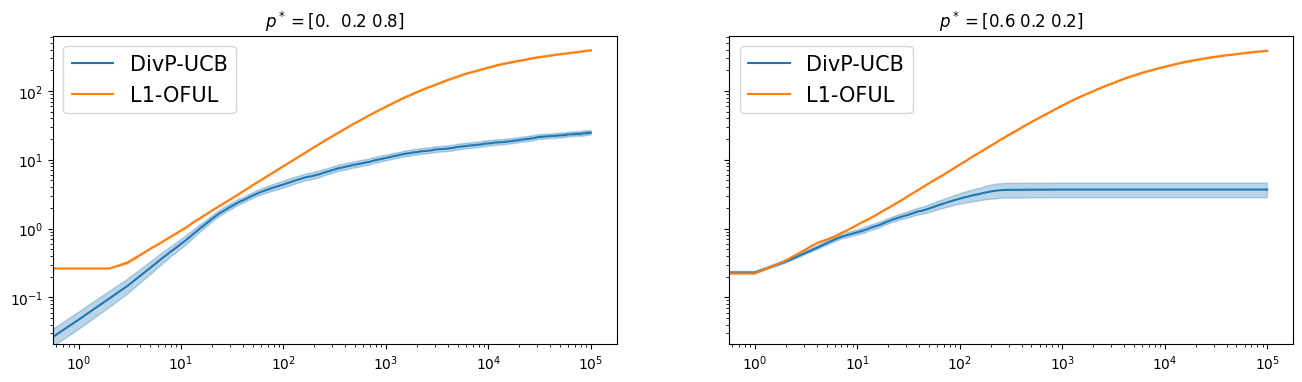

In [48]:
T = 100000

alg_list = [
            algs.DivPUCBFinite(K, Plist, label='DivP-UCB', sig=1/4, noise="gaussian"),
            algs.L1OFULFinite(K, Plist, label="L1-OFUL", delta=1 / T),
           ]

N_tests = [100 for _ in band_list]

data_dict={
        'name':'Transition from logarithmic to bounded regret',
        'short_name':'logvbounded_FTL',
        'T':T,
        'N_tests':N_tests,
        'band_list':band_list,
        'alg_list':alg_list,
        'results':None,   
        'folder':'figures/diversity/',
    }

launch(data_dict, checkpoints=False)

plot_and_save(data_dict,
                save_figure=False,
                log_scale=True,
                show_vars=True,
                )
